In [76]:
# Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Dados
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [21]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [78]:
# Dividir entre x e y
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [79]:
# Encode dos categoricos
label_encoder1 = LabelEncoder()
previsores[:,0] = label_encoder1.fit_transform(previsores[:,0])

label_encoder2 = LabelEncoder()
previsores[:,2] = label_encoder1.fit_transform(previsores[:,2])

label_encoder3 = LabelEncoder()
previsores[:,3] = label_encoder1.fit_transform(previsores[:,3])

label_encoder4 = LabelEncoder()
previsores[:,5] = label_encoder1.fit_transform(previsores[:,5])

label_encoder5 = LabelEncoder()
previsores[:,6] = label_encoder1.fit_transform(previsores[:,6])

label_encoder6 = LabelEncoder()
previsores[:,8] = label_encoder1.fit_transform(previsores[:,8])

label_encoder7 = LabelEncoder()
previsores[:,9] = label_encoder1.fit_transform(previsores[:,9])

label_encoder8 = LabelEncoder()
previsores[:,11] = label_encoder1.fit_transform(previsores[:,11])

label_encoder9 = LabelEncoder()
previsores[:,13] = label_encoder1.fit_transform(previsores[:,13])

label_encoder10 = LabelEncoder()
previsores[:,14] = label_encoder1.fit_transform(previsores[:,14])

label_encoder11 = LabelEncoder()
previsores[:,16] = label_encoder1.fit_transform(previsores[:,16])

label_encoder12 = LabelEncoder()
previsores[:,18] = label_encoder1.fit_transform(previsores[:,18])

label_encoder13 = LabelEncoder()
previsores[:,19] = label_encoder1.fit_transform(previsores[:,19])

In [80]:
# Treino e Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [81]:
# Modelo
naive_bayes = GaussianNB()

In [82]:
# Treina Modelo
naive_bayes.fit(x_treino, y_treino)
previsoes = naive_bayes.predict(x_teste)

In [83]:
# Matriz de confusao
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

<AxesSubplot:>

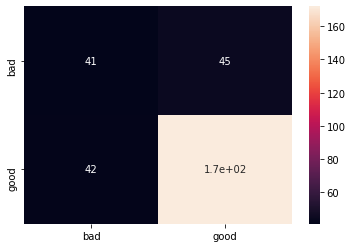

In [84]:
# Visual da matriz
df_confusao = pd.DataFrame(confusao, index=['bad', 'good'], columns=['bad', 'good'])
sns.heatmap(df_confusao, annot=True)

In [85]:
# Metrica
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

In [86]:
# Usar algoritmo com novo dado
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito.shape

(1, 20)

In [87]:
# Encode de novo dado
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = label_encoder1.fit_transform(novo_credito[:,0])
novo_credito[:,2] = label_encoder2.fit_transform(novo_credito[:,2])
novo_credito[:,3] = label_encoder3.fit_transform(novo_credito[:,3])
novo_credito[:,5] = label_encoder4.fit_transform(novo_credito[:,5])
novo_credito[:,6] = label_encoder5.fit_transform(novo_credito[:,6])
novo_credito[:,8] = label_encoder6.fit_transform(novo_credito[:,8])
novo_credito[:,9] = label_encoder7.fit_transform(novo_credito[:,9])
novo_credito[:,11] = label_encoder8.fit_transform(novo_credito[:,11])
novo_credito[:,13] = label_encoder9.fit_transform(novo_credito[:,13])
novo_credito[:,14] = label_encoder10.fit_transform(novo_credito[:,14])
novo_credito[:,16] = label_encoder11.fit_transform(novo_credito[:,16])
novo_credito[:,18] = label_encoder12.fit_transform(novo_credito[:,18])
novo_credito[:,19] = label_encoder13.fit_transform(novo_credito[:,19])

In [88]:
# Prever se novo dado é bom ou mal pagado
nova_previsoes = naive_bayes.predict(novo_credito)
nova_previsoes

array(['good'], dtype='<U4')